In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [12]:
#importing data from github file and converting into a DataFrame 
data=pd.read_csv('https://raw.githubusercontent.com/Sankalpmahapatra10/Practice_Projects/main/avocado_new.txt')
data.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [14]:
#finding number of rows and columns
data.shape

(18249, 14)

In [15]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observations from the above dataset after finding out the statistics of the data:-

1.The difference between mean and standard deviation is appears to be good in all the features except 'Total Bags' , 'Small Bags' and 'XLarge Bags'where the standard deviation is more as compared to the mean.

2.Also the difference between all the quantiles for most of  the features is  very big so there may be some outliers and skweness present there. we will find out that during visualization of the data.

3.As the count is found out to be 18249 here which is matching the number of rows so we can say that there is no null values(NANs) present in the dataset.

4.There are 18249 rows and 14 columns present in the dataset.

5.Minimum vaule for  columns 4046,4225,4770,Total Bags,Small Bags,Large Bags and XLarge Bags is 0.

In [16]:
#finding the null values in each column
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We have crossed checked for the null values and we found out zero NANS in the dataset.

In [17]:
#no. of columns in the dataset
data.columns


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [18]:
#checking different datatypes present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


The dataset contains int, float and object datatype. As a machine learning model can not work on object datatypes so we need to encode the object datatypes values properly.

In [19]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Encoding columns having object data types

In [20]:
#encoding the type column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [21]:
data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [22]:
df=lab_enc.fit_transform(data['type'])
pd.Series(df)

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Length: 18249, dtype: int32

In [23]:
data['type']=df
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


In [24]:
#encoding the region column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [25]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [26]:
df2=lab_enc.fit_transform(data['region'])
pd.Series(df2)

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Length: 18249, dtype: int32

In [27]:
data['region']=df2
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [28]:
#unnamed column only has indexes so lets remove that
data=data.drop(columns=['Unnamed: 0'], axis=1)

In [29]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [30]:
#now lets convert the date into two differnt columns like month and day as date is a object type
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [31]:
#checking the dataset
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [32]:
#now lets remove the date column as already we have month day and year as separate columns
data=data.drop(columns=['Date'], axis=1)

In [33]:
#checking the dataset
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


# Visualization

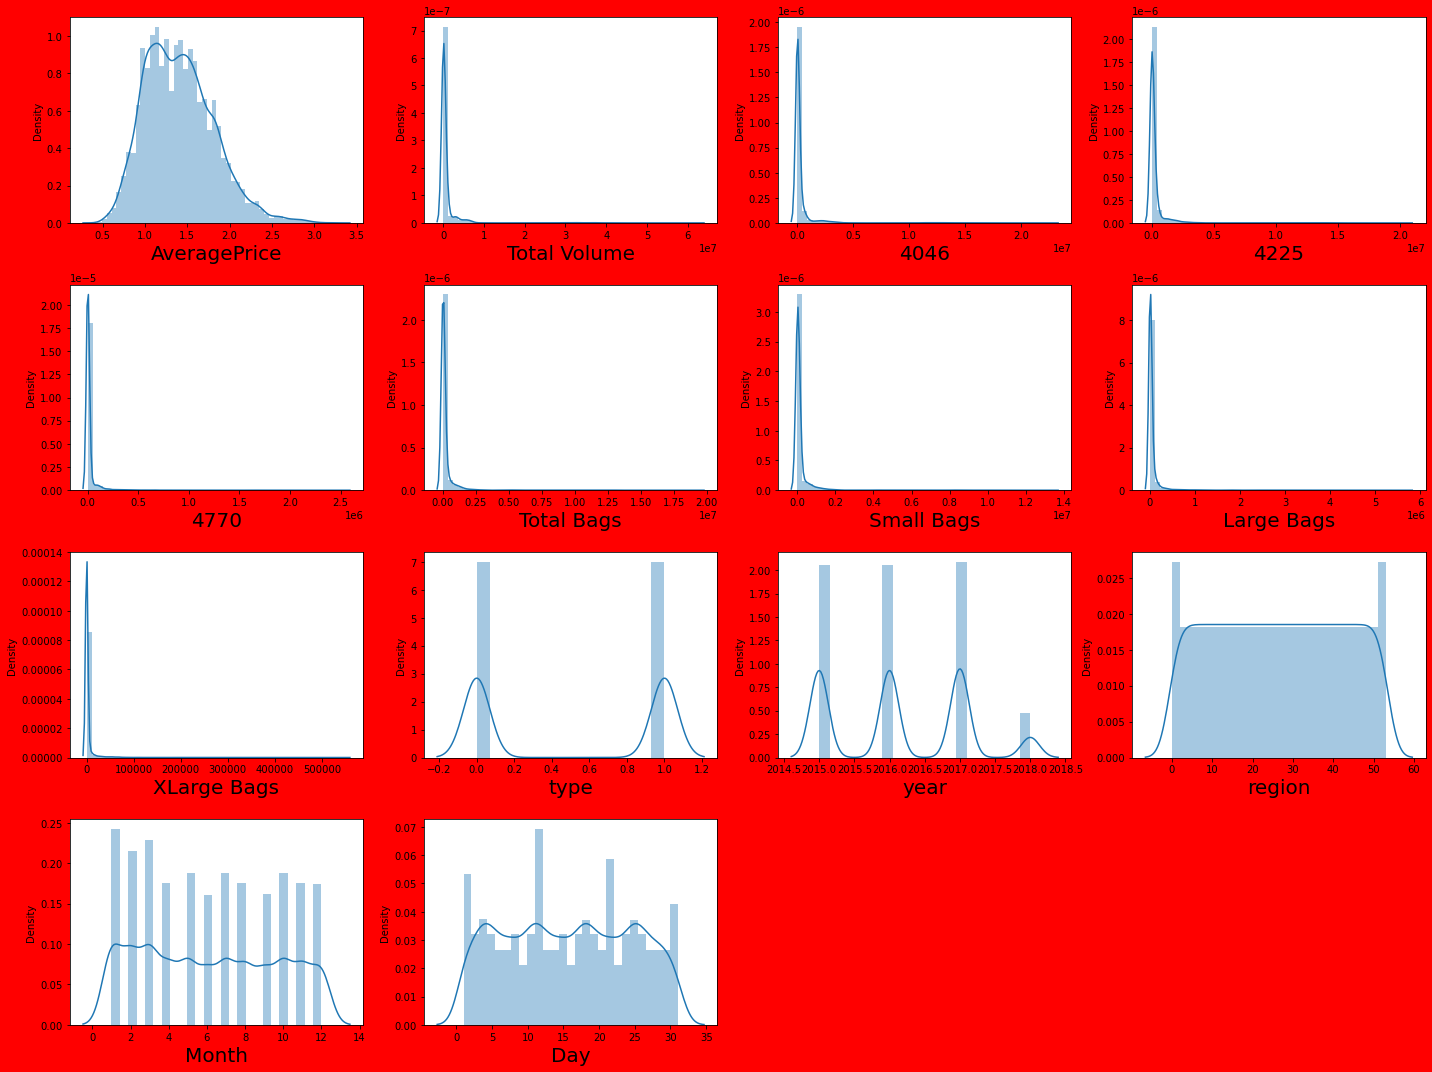

In [34]:
# now the data looks good and there is no missing values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

1.The data distribution does not look decent enough for most of the features i.e. it does not show normal distribution for most of the features(the curve is not bell shaped). 

2.We can observe that some features like Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags and XLarge Bags are little bit skewed. 

3.We do not need to consider features like type, year, region month and day as they have catagorical data.

4.now lets find out if there is actual skewness in the above features i.e. whether they have outliers by plotting box plots. 

In [35]:
df_features=data.drop('AveragePrice', axis=1)

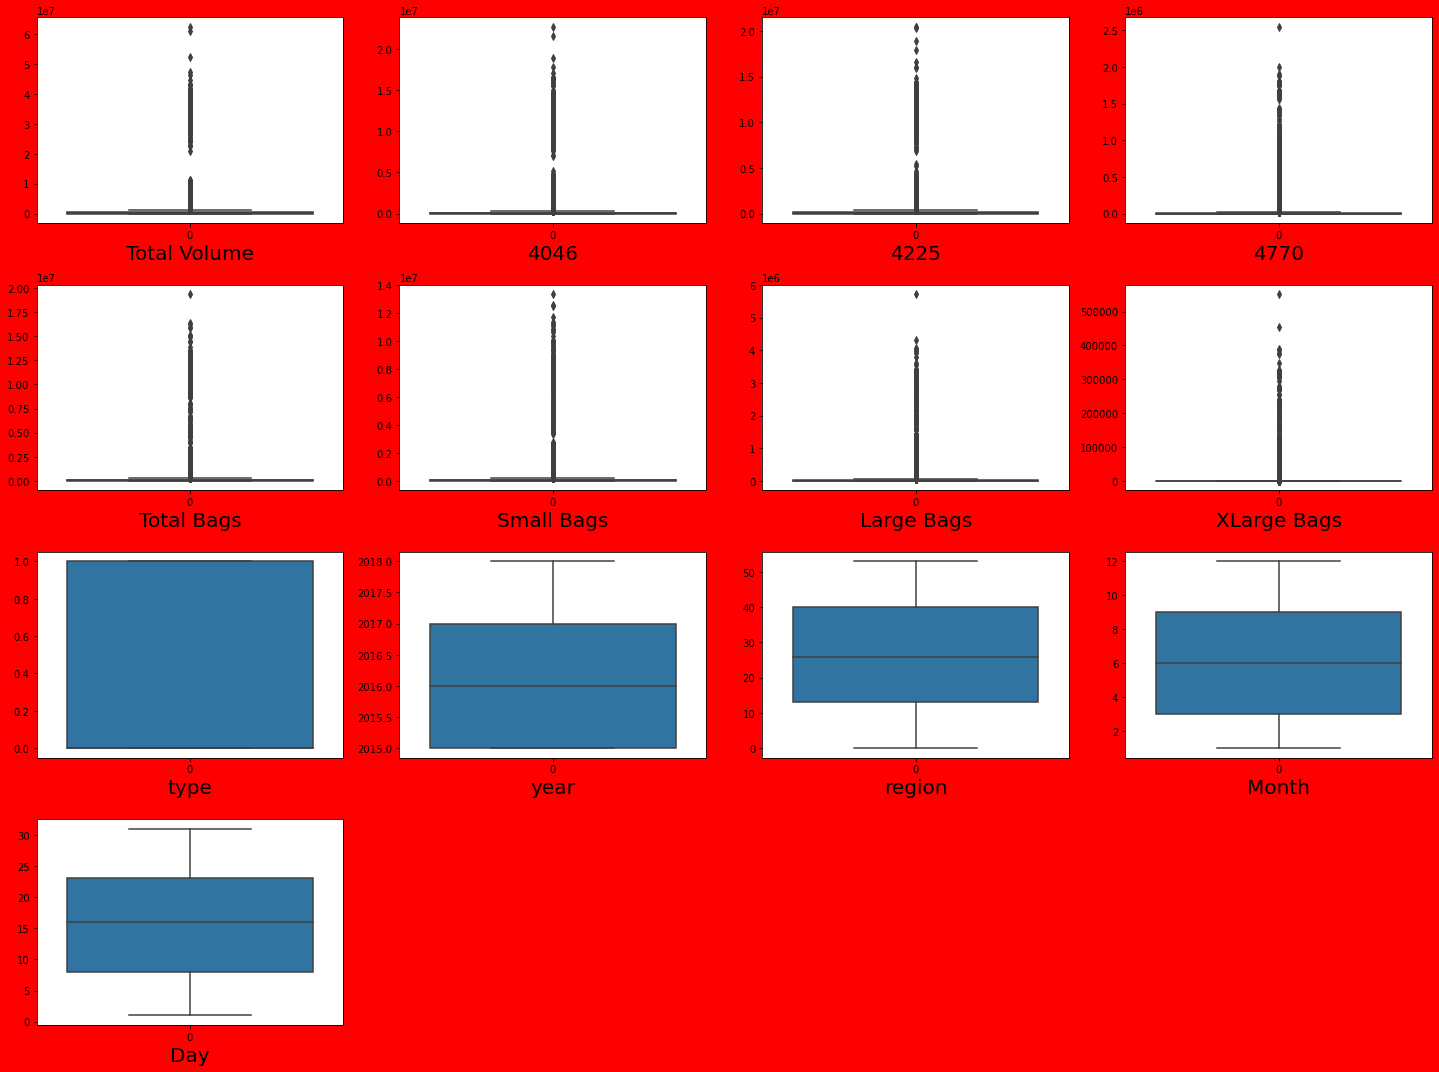

In [36]:
#Now lets find the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=13:
        plt.subplot(4,4,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Observations from the box plots

1.features like Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags have a lot of outliers.	
2.remainig features does not contain outliers.



Lets plot some more graphs to have a better understanding of the data 

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

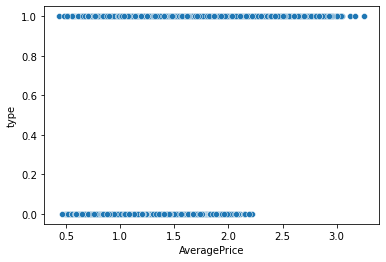

In [37]:
sns.scatterplot(y="type", x="AveragePrice", data=data, palette = 'pink')

From this we can say that the price of the organic avocado is more than that of conventional avocado.

In [39]:
#correlation between the features and labels

y=data['AveragePrice']
x=data.drop(columns=['AveragePrice'])

In [40]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [41]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [42]:
#finding the corelation between the features in the data set
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


In [43]:
#sorting the correlation values of averageprice with all the columns
data.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
Day             0.027386
year            0.093197
Month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

To get a more clear view lets plot the heat map. we can get all the correlation there

<AxesSubplot:>

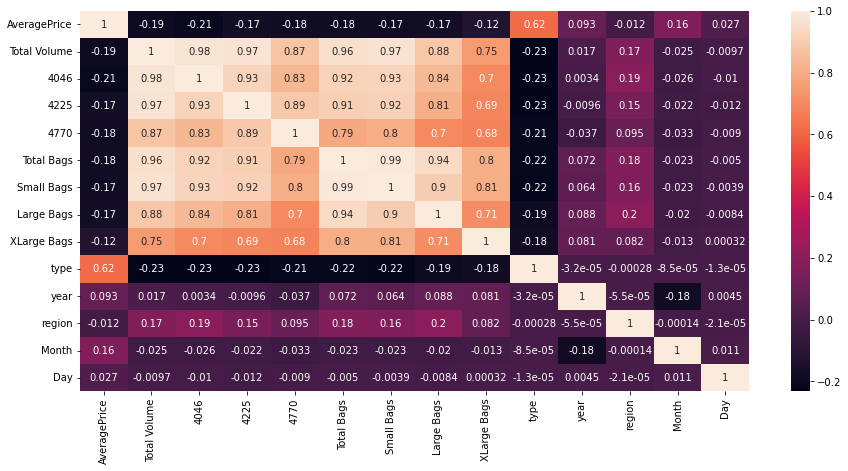

In [44]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

observations from the heatmap plot
1.all the features have weak correlation with the label(AveragePrice).
2.some of the features have strong correaltion between each other like large bags and small bags, small bags with toatal volume etc. 
3.most of the features have multi-colinearity. we will use VIF to find more about multi-colinearity.

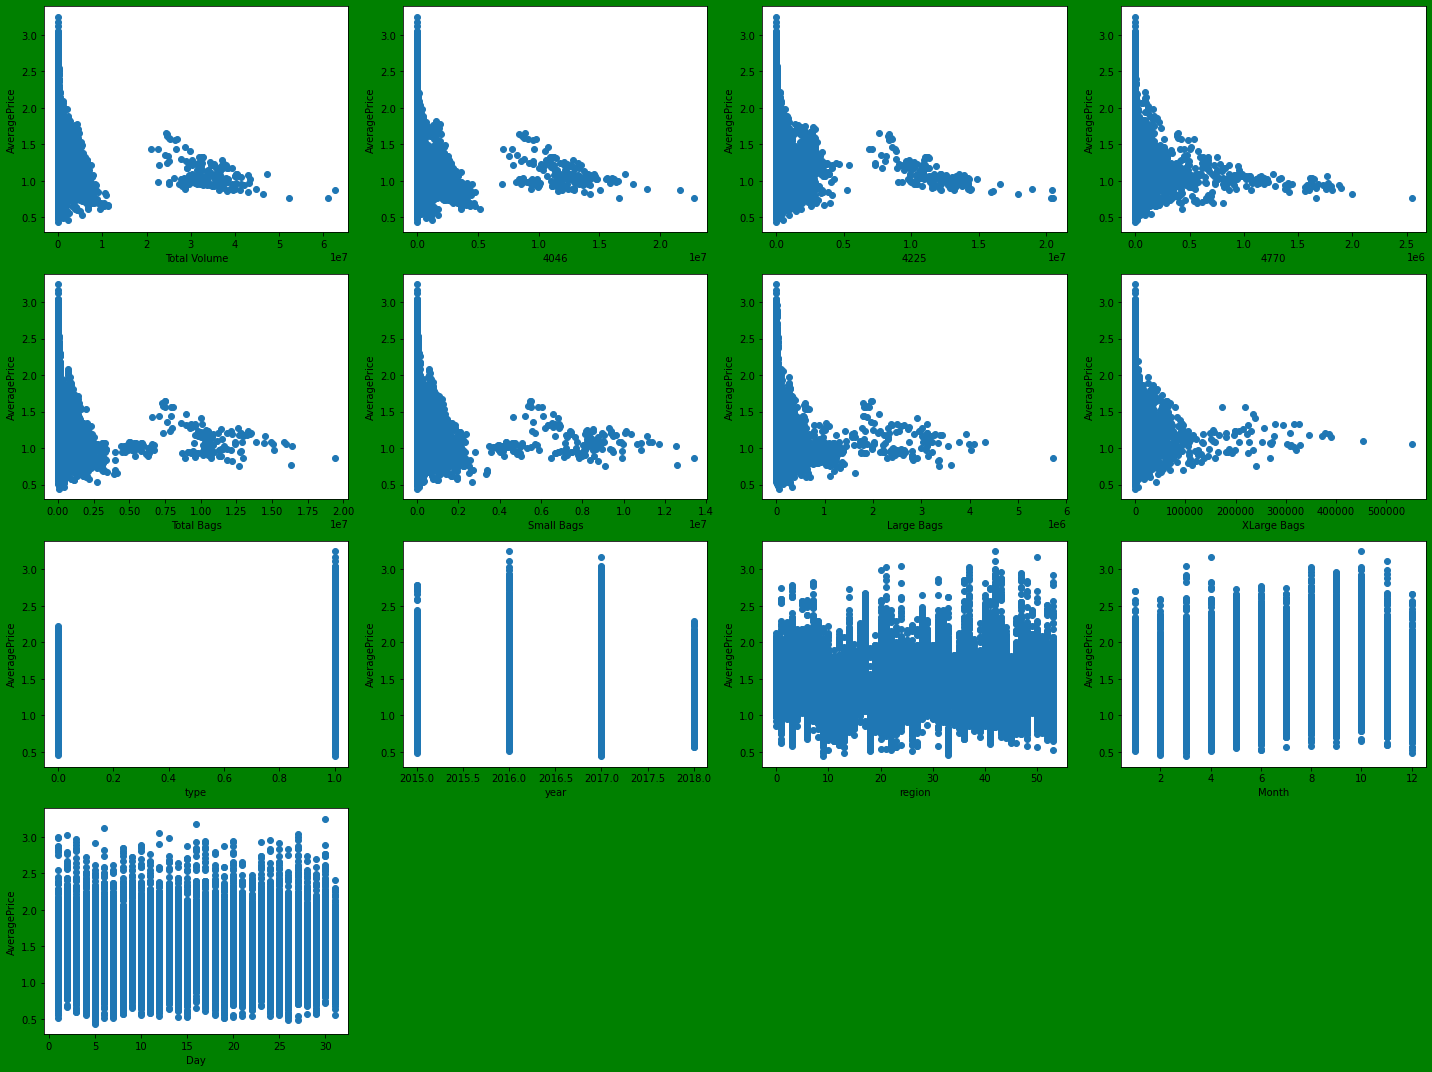

In [45]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('AveragePrice',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

The trend is not clear here, so lets plot the regplot for a better view of the trend in relationship between the features and the label.

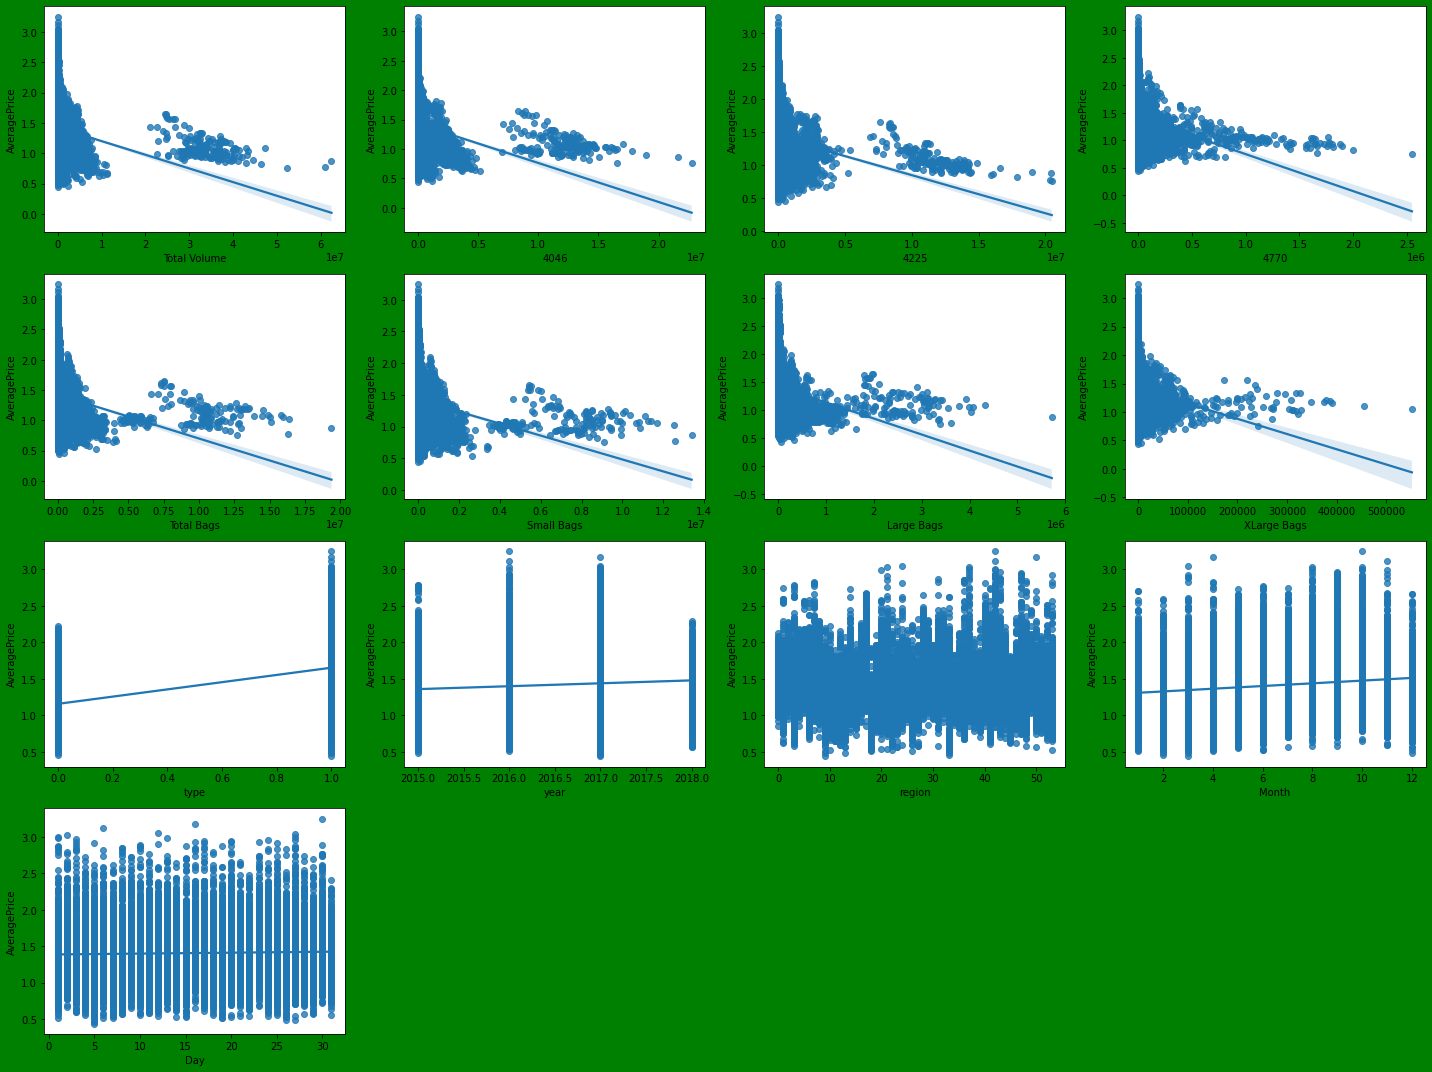

In [46]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.regplot(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('AveragePrice',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

Observations from the regplot:-

1.Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags and XLarge Bags are negatively co-related with label(AveragePrice) as the trend is in downward direction.

2.type,year,region,Monthand Day are weakly co-related with the the label(AveragePrice ) as trend is neither completely upward.

3.region does not show any correlation with label(AveragePrice).


In [47]:
data.rename(columns = {'Total Volume':'Total_Volume', '4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770','Total Bags':'Total_Bags','Small Bags':'Small_Bags','Large Bags':'Large_Bags','XLarge Bags': 'XLarge_Bags'}, inplace = True)

In [48]:
data.head(2)

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20


In [49]:
#assigning our datset to a new variable for testing the feasibility after removing the outliers
df=data

Now lets deal with the outliers and see whether it is feasible in this dataset

In [50]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

AveragePrice         0.56
Total_Volume    422123.71
PLU_4046        110166.13
PLU_4225        147198.08
PLU_4770          6243.42
Total_Bags      105694.73
Small_Bags       80488.25
Large_Bags       21901.78
XLarge_Bags        132.50
type                 1.00
year                 2.00
region              27.00
Month                6.00
Day                 15.00
dtype: float64

In [51]:
#removing the outliers for Total_Volume
vol_high=q3.Total_Volume + (1.5 * iqr.Total_Volume)


index=np.where(df['Total_Volume'] > vol_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(15952, 14)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
15948,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
15949,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
15950,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [52]:
#removing the outliers for PLU_4046
p_high=q3.PLU_4046 + (1.5 * iqr.PLU_4046)


index=np.where(df['PLU_4046'] > p_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(15353, 14)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15348,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
15349,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
15350,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
15351,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [53]:
#removing the outliers for PLU_4225
l_high=q3.PLU_4225 + (1.5 * iqr.PLU_4225)


index=np.where(df['PLU_4225'] > l_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(14721, 14)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14716,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
14717,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
14718,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
14719,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [54]:
#removing the outliers for PLU_4770
u_high=q3.PLU_4770 + (1.5 * iqr.PLU_4770)


index=np.where(df['PLU_4770'] > u_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(13755, 14)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13750,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
13751,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
13752,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
13753,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [55]:
#removing the outliers for Total_Bags
tb_high=q3.Total_Bags + (1.5 * iqr.Total_Bags)


index=np.where(df['Total_Bags'] > tb_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(13539, 14)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13534,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
13535,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
13536,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
13537,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [56]:
#removing the outliers for Small_Bags
sb_high=q3.Small_Bags + (1.5 * iqr.Small_Bags)


index=np.where(df['Small_Bags'] > sb_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(13505, 14)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13500,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
13501,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
13502,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
13503,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [57]:
#removing the outliers for Large_Bags
lb_high=q3.Large_Bags + (1.5 * iqr.Large_Bags)


index=np.where(df['Large_Bags'] > lb_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(12965, 14)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12960,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
12961,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
12962,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
12963,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [58]:
#removing the outliers for XLarge_Bags
xb_high=q3.XLarge_Bags + (1.5 * iqr.XLarge_Bags)


index=np.where(df['XLarge_Bags'] > xb_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(11747, 14)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11742,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
11743,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
11744,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
11745,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [59]:
data.shape

(18249, 14)

In [60]:
df.shape

(11747, 14)

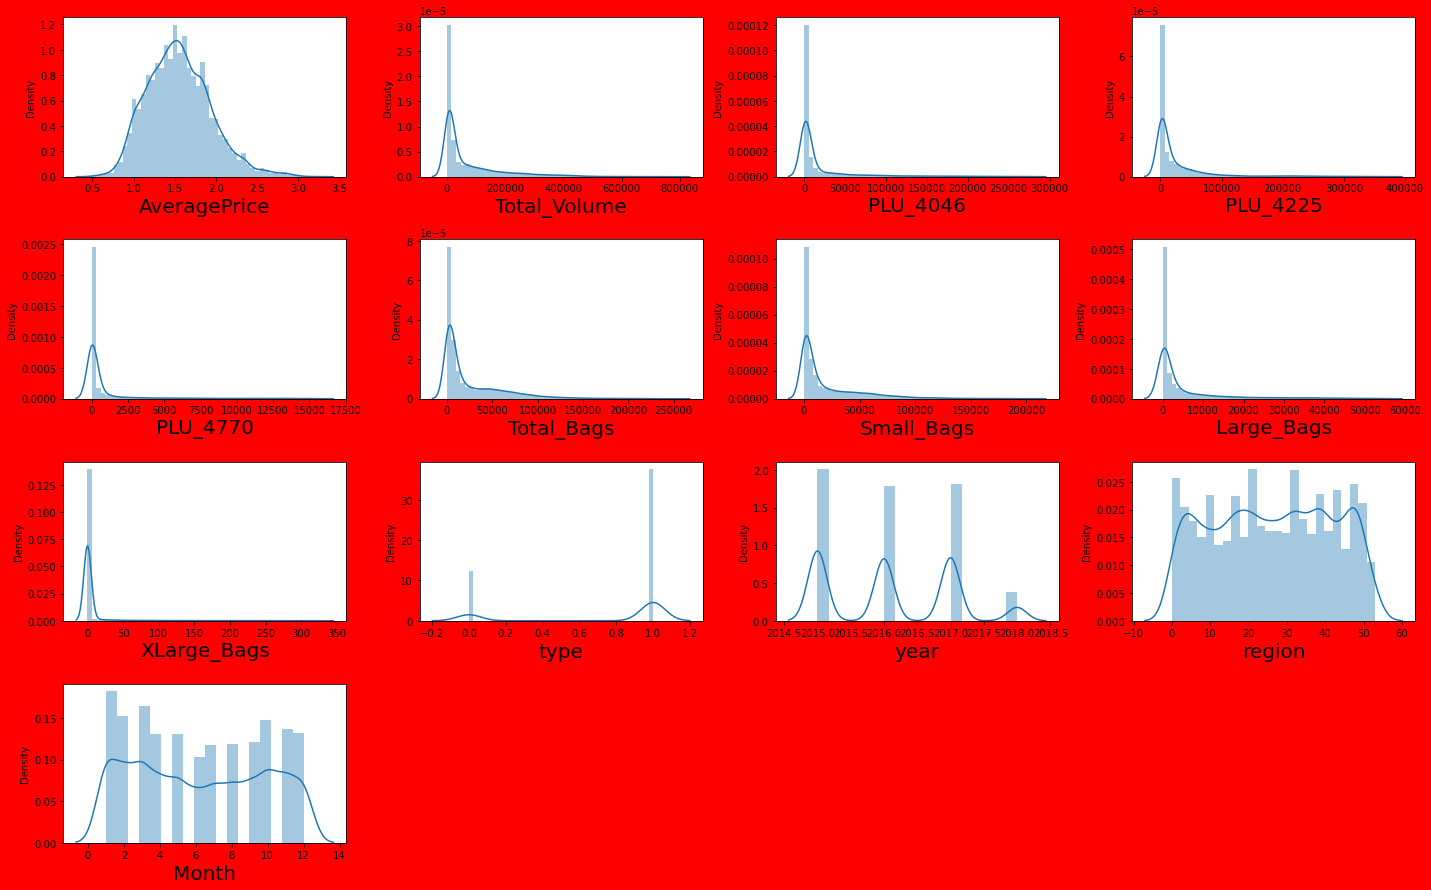

In [61]:
#now lets check if the outliers are removed
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

The distribution is looking much better as compared to before outliers were removed.

In [62]:
data=df

In [63]:
data.shape


(11747, 14)

# Building Regression models for prediction of AveragePrice

In [64]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [65]:
x_scaled.shape[1]

13

Now as the label or the target variable is a continuous data so this is a regression problem. We will be building some regression algorithms for this problem and we will find out the best machine learning model among them.

In [66]:
# Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns


vif

,VIF,Features
0,4.926465e+09,Total Volume
1,6.609602e+08,4046
2,5.988844e+08,4225
3,4.770265e+06,4770
4,2.370316e+14,Total Bags
5,1.364727e+14,Small Bags
6,1.450435e+13,Large Bags
7,7.622368e+10,XLarge Bags
8,1.061752e+00,type
9,1.084444e+00,year


Observations after finding the  variance inflation factor 

1.features like Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags and XLarge_Bags are highly multi-collinear with other features as they have a VIF score greater than 5.

2.features like type,year,region,Month and Day are moderately multi-collinear with other features as they have a VIF score between 1 and 5.

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

In [68]:
#now lets split the dat into train and test for training nad testing of the the machine learning algorithms
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=200)
y_train.head()

17284    1.21
2378     0.83
5435     0.98
12177    1.59
44       1.07
Name: AveragePrice, dtype: float64

# Linear Regression

In [69]:
# prediction through the linear regression algorithm
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [70]:
data.tail()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53,1,7


In [71]:
#prediction of Average price
print('Average price is', regression.predict(scalar.transform([[17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4]])))

Average price is [1.65869804]


In [72]:
#how well the model fits the training data
regression.score(x_train, y_train)

0.43300353987046847

In [73]:
#lets check how well the model fits the testing data
regression.score(x_test, y_test)

0.45618562570105825

In [74]:
#plotting the predicted value of y with the actual value of y
y_pred=regression.predict(x_test)
y_pred

array([1.52787116, 1.59739076, 1.55764314, ..., 1.60093399, 1.0977152 ,
       1.64767586])

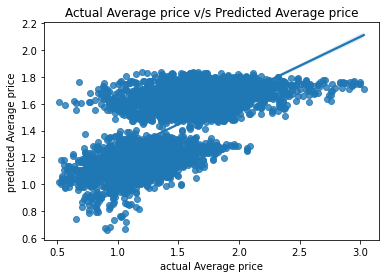

In [75]:

sns.regplot(y_test, y_pred)
plt.xlabel('actual Average price')
plt.ylabel('predicted Average price')
plt.title('Actual Average price v/s Predicted Average price')
plt.show()

The graph shows a upward linear trend.

In [76]:
#now lets use some more model evaluation techniques on linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
mean_absolute_error(y_test,y_pred)

0.23022910787925116

In [78]:
mean_squared_error(y_test,y_pred)

0.08982988903678463

In [79]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2997163476301962

We can observe that the error is little bit more. so now lets see if our model is overfitting or not by using some regularization techniques.

In [101]:
from sklearn.linear_model import Ridge ,Lasso ,RidgeCV,LassoCV
lasscv=LassoCV(alphas=None, max_iter=100 ,normalize=True )
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [102]:
#finding the value of alpha
alpha=lasscv.alpha_
alpha

2.122542637470884e-06

In [103]:
#now that we have best parameters lets use lasso regression and see how our datahas fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.122542637470884e-06)

In [104]:
#r2 score
lasso_reg.score(x_test,y_test)

0.4400771353556814

In [105]:
#using ridge regularization
ridgecv=RidgeCV(alphas= np.arange(0.001,0.1,0.01) ,normalize=True )
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [106]:
ridgecv.alpha_

0.001

In [107]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [108]:
#adjusted r2 score
ridge_model.score(x_test,y_test)

0.4400788926981386

we have got arround the same adjusted R2 (r squared) value from both ridge and Lasso regression so, it is safe to say that there is no overfitting problem here. from this we can say that the OLS model has been well trained on the training data. But we can also observe that the model accuracy is very less so we can not chose this algorithm to build our final model. so lets build other models using different regression algorithms.

# K Nearest Neighbours model

In [80]:
#splitting the datset into test and train
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

839      1.09
3392     0.95
5944     1.53
8787     1.13
13876    1.84
Name: AveragePrice, dtype: float64

In [81]:
#Training the model

knn=KNeighborsRegressor()
knn.fit(x_train, y_train)




KNeighborsRegressor()

In [82]:
#prediction of Average price
print('Average price is', knn.predict(scalar.transform([[17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4]])))

Average price is [1.496]


In [83]:
#how well the model fits the training data
knn.score(x_train, y_train)

0.6848803489350439

In [84]:
#lets check how well the model fits the testing data
knn.score(x_test, y_test)

0.5327165861190626

In [85]:
#plotting the predicted value of y with the actual value of y
y_pred=knn.predict(x_test)
y_pred


array([1.348, 1.714, 1.7  , ..., 1.226, 1.546, 0.932])

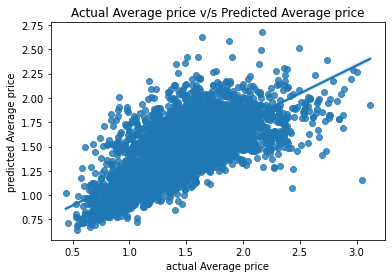

In [86]:
sns.regplot(y_test, y_pred)
plt.xlabel('actual Average price')
plt.ylabel('predicted Average price')
plt.title('Actual Average price v/s Predicted Average price')
plt.show()

The graph shows a upward linear trend.

# SVM Model

In [87]:
from sklearn.svm import SVR
# splitting the DataFrame into tain and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

839      1.09
3392     0.95
5944     1.53
8787     1.13
13876    1.84
Name: AveragePrice, dtype: float64

In [88]:
# training the data
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [89]:
#prediction of Average price
print('Average price is', svr.predict(scalar.transform([[17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4]])))

Average price is [1.49992833]


In [90]:
#how well the model fits the training data
svr.score(x_train, y_train)

0.5937597452360797

In [91]:
#lets check how well the model fits the testing data
svr.score(x_test, y_test)

0.5882477520627425

In [92]:
#plotting the predicted value of y with the actual value of y
y_pred=svr.predict(x_test)
y_pred

array([1.30733342, 1.63136352, 1.67514065, ..., 1.015387  , 1.60312044,
       1.09493098])

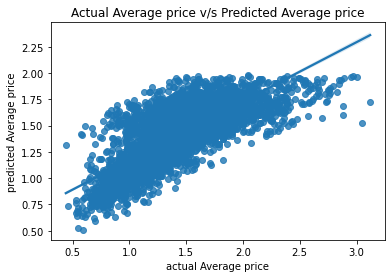

In [93]:
sns.regplot(y_test, y_pred)
plt.xlabel('actual Average price')
plt.ylabel('predicted Average price')
plt.title('Actual Average price v/s Predicted Average price')
plt.show()

The graph shows a upward linear trend.

# Random Forest Model

In [94]:
from sklearn.ensemble import RandomForestRegressor
# splitting the DataFrame into tain and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

839      1.09
3392     0.95
5944     1.53
8787     1.13
13876    1.84
Name: AveragePrice, dtype: float64

In [95]:
# training the data
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [96]:
#prediction of Average price
print('Average price is', rf.predict(scalar.transform([[17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4]])))

Average price is [1.4696]


In [97]:
#how well the model fits the training data
rf.score(x_train, y_train)

0.9842567234341143

In [98]:
#lets check how well the model fits the testing data
rf.score(x_test, y_test)

0.8873525255381693

In [99]:
#plotting the predicted value of y with the actual value of y
y_pred=rf.predict(x_test)
y_pred

array([1.3325, 1.4516, 1.8044, ..., 1.1254, 1.2219, 0.8689])

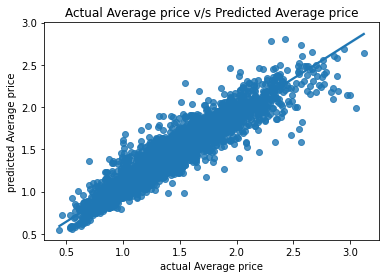

In [100]:
sns.regplot(y_test, y_pred)
plt.xlabel('actual Average price')
plt.ylabel('predicted Average price')
plt.title('Actual Average price v/s Predicted Average price')
plt.show()

The graph shows a upward linear trend.

# Selection of the best Machine learning Model

We have Instantiated 4 different models and checked their predicted the average price of avacados and we have also checked in each case how well the model fits the training and testing data. we are evaluating the model based on their adjusted R2 scores. Based on the adjusted R2 scores we have identified the k nearest neighbour regressor model to be the best model in this case and we will carry our investigation forward with the k nearest neighbour regressor model.

# Now lets use some Cross validation  and hyperparameter tuning techniques to see whether we can improve the accuracy of our model.

In [122]:
#cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(regression,x_scaled,y,cv=10)

array([-0.32633085,  0.0654106 ,  0.19644906,  0.01407185, -0.02595313,
       -0.32199823, -0.04319305,  0.01019042,  0.06263575,  0.06416351])

In [123]:
cross_val_score(LinearRegression(),x_scaled,y,cv=15).mean()

0.016793218354898855

In [124]:
#cross validation using knn model

from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_scaled,y,cv=5)

array([-0.45858233,  0.22385409,  0.41996125, -0.17495437, -0.23998843])

In [125]:
cross_val_score(KNeighborsRegressor(),x_scaled,y,cv=5).mean()

-0.0459419555154984

In [127]:
#performing hyperparameter tuning for knn method
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}

In [128]:
gridsearch=GridSearchCV(estimator= knn , param_grid=param_grid )

In [129]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [130]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [ ]:
knn=KNeighborsRegressor(algorithm='kd_tree', leaf_size=3,n_neighbors=13)

In [131]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [133]:
ypred=knn.predict(x_test)

In [134]:
knn.score(x_test, y_test)


0.5327165861190626

In [135]:
knn.score(x_train,y_train)

0.6848803489350439

In [136]:
#plotting the predicted value of y with the actual value of y
y_pred=knn.predict(x_test)
y_pred


array([1.348, 1.714, 1.7  , ..., 1.226, 1.546, 0.932])

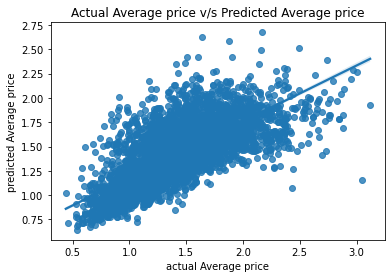

In [137]:
sns.regplot(y_test, y_pred)
plt.xlabel('actual Average price')
plt.ylabel('predicted Average price')
plt.title('Actual Average price v/s Predicted Average price')
plt.show()

# Building classification models for predicting the region

In [148]:
df3=data

In [149]:
#finding the corelation between the features in the data set
df3.corr()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.399661,-0.372513,-0.264103,-0.296603,-0.358126,-0.318388,-0.276977,-0.163166,0.498813,0.102473,0.020015,0.157240,0.015860
Total_Volume,-0.399661,1.000000,0.750080,0.839535,0.547448,0.844045,0.815358,0.450404,0.282063,-0.712947,-0.039996,0.084821,-0.023405,-0.001652
PLU_4046,-0.372513,0.750080,1.000000,0.339608,0.484210,0.560097,0.500255,0.426162,0.204245,-0.582087,-0.109293,0.143986,-0.022067,-0.005064
PLU_4225,-0.264103,0.839535,0.339608,1.000000,0.430960,0.589794,0.601333,0.216090,0.217404,-0.574494,-0.087412,0.004166,-0.020070,-0.000594
PLU_4770,-0.296603,0.547448,0.484210,0.430960,1.000000,0.370044,0.386087,0.107797,0.221745,-0.488936,-0.121748,0.033713,-0.022045,0.003403
Total_Bags,-0.358126,0.844045,0.560097,0.589794,0.370044,1.000000,0.963107,0.542907,0.273772,-0.575841,0.157181,0.082194,-0.012923,0.001717
Small_Bags,-0.318388,0.815358,0.500255,0.601333,0.386087,0.963107,1.000000,0.296875,0.258989,-0.561962,0.139783,0.056980,-0.009164,0.003340
Large_Bags,-0.276977,0.450404,0.426162,0.216090,0.107797,0.542907,0.296875,1.000000,0.159938,-0.288961,0.121462,0.113905,-0.017325,-0.004254
XLarge_Bags,-0.163166,0.282063,0.204245,0.217404,0.221745,0.273772,0.258989,0.159938,1.000000,-0.347724,0.062360,0.006647,0.015191,-0.021138
type,0.498813,-0.712947,-0.582087,-0.574494,-0.488936,-0.575841,-0.561962,-0.288961,-0.347724,1.000000,0.075750,-0.029787,-0.021727,-0.001599


In [150]:
#sorting the correlation values of region with all the columns
df3.corr()['region'].sort_values()

type           -0.029787
year           -0.023907
Month          -0.007276
Day             0.003089
PLU_4225        0.004166
XLarge_Bags     0.006647
AveragePrice    0.020015
PLU_4770        0.033713
Small_Bags      0.056980
Total_Bags      0.082194
Total_Volume    0.084821
Large_Bags      0.113905
PLU_4046        0.143986
region          1.000000
Name: region, dtype: float64

To get a more clear view lets plot the heat map. we can get all the correlation there

<AxesSubplot:>

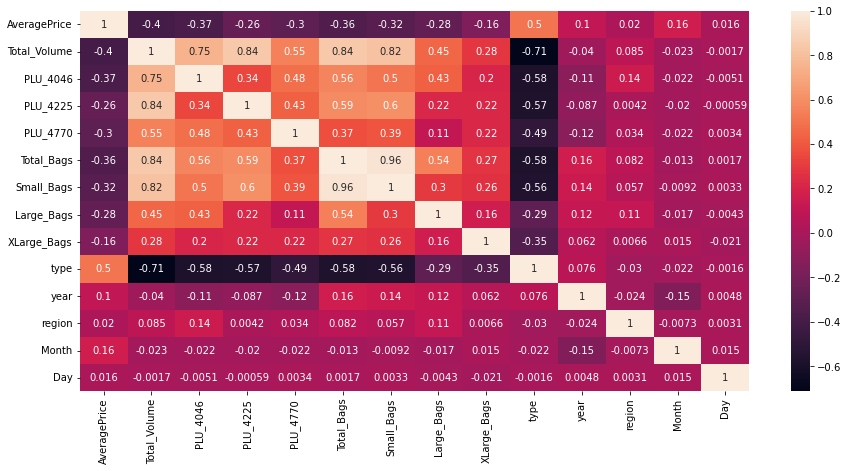

In [152]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(df3.corr(),annot=True)

observations from the heatmap plot 

1.all the features have weak correlation with the label(region).

2.some of the features have strong correaltion between each other like large bags and small bags, small bags with toatal volume etc. 

3.most of the features have multi-colinearity.

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

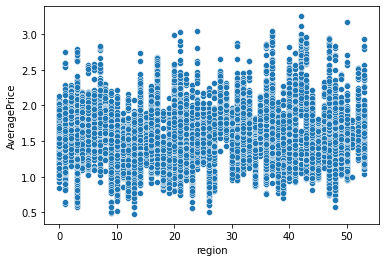

In [153]:
sns.scatterplot(y="AveragePrice", x="region", data=df3, palette = 'pink')

lets plot some more graphs to find out more about the data

In [154]:
#correlation between the features and labels

y=df3['region']
x=df3.drop(columns=['region'])

In [155]:
x

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14


In [156]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 11747, dtype: int32

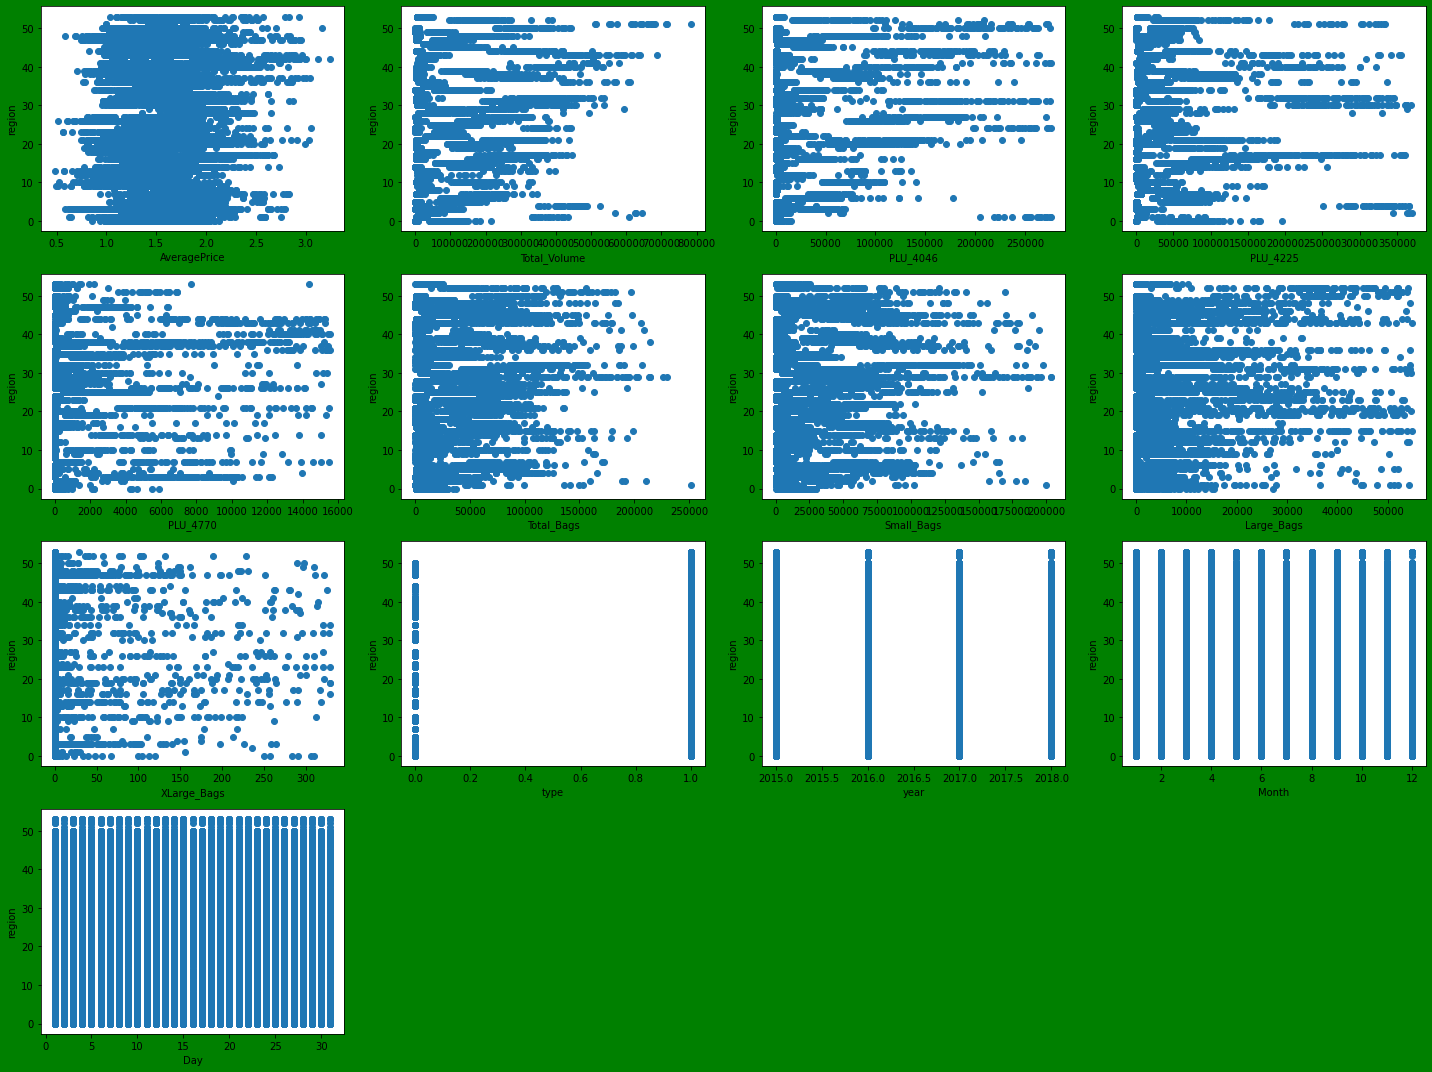

In [157]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('region',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

The trend is not clear here, so lets plot the regplot for a better view of the trend in relationship between the features and the label.

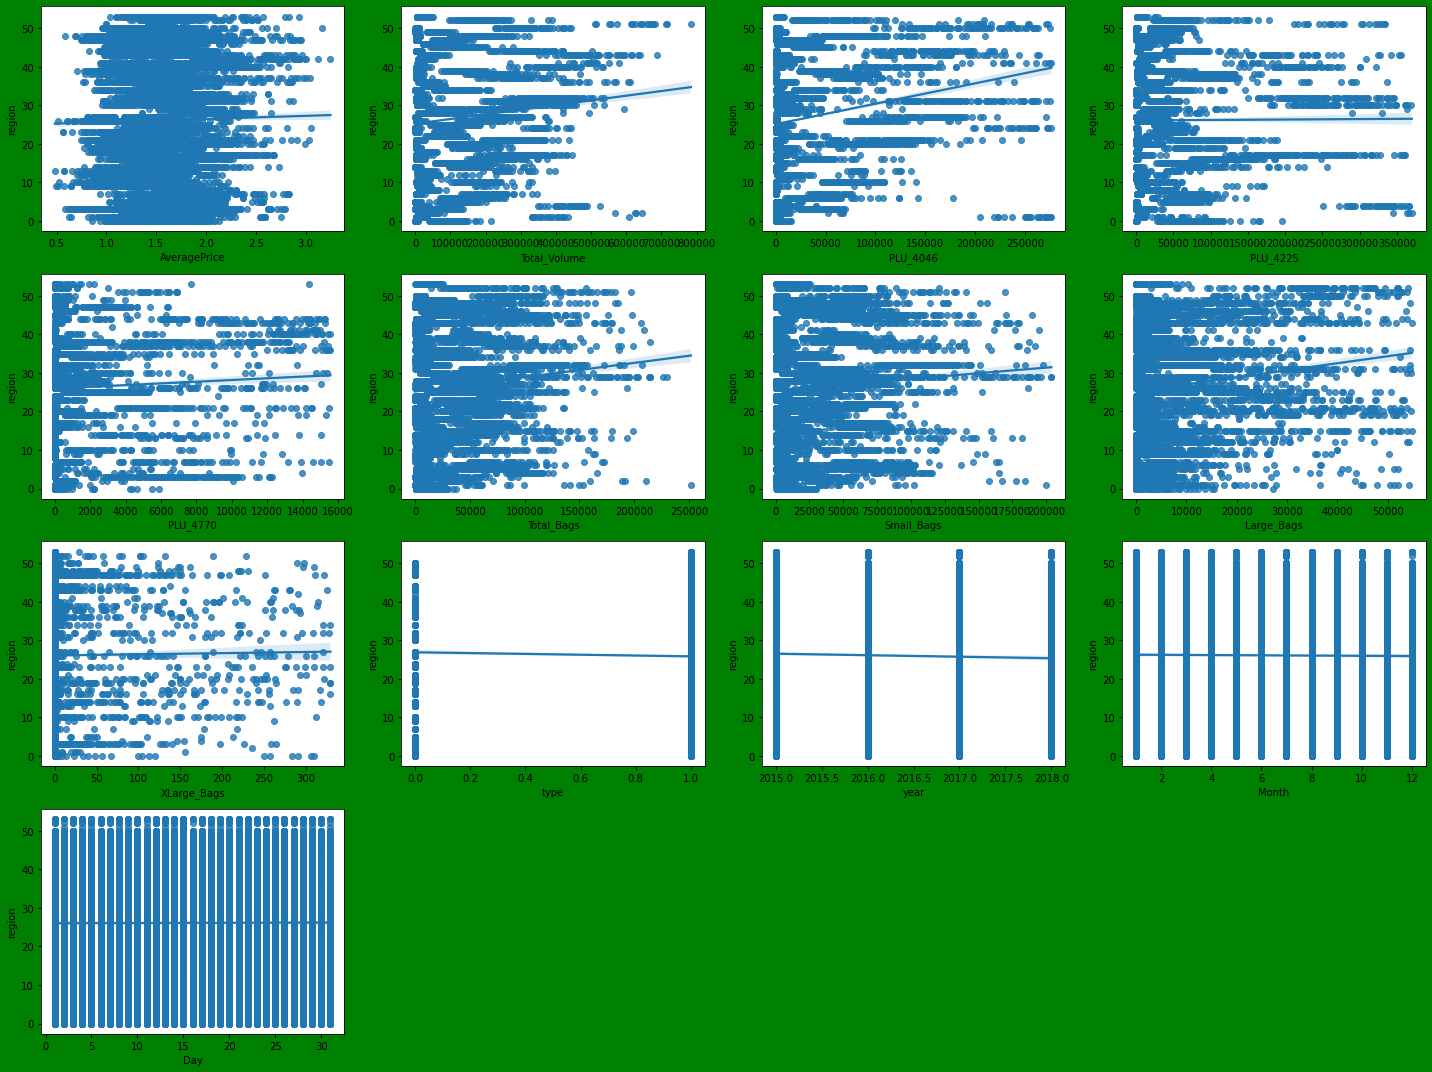

In [158]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.regplot(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('region',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

Observations from the regplot:-

1.Averageprice, Total Volume,PLU_4046,PLU_4770,Total Bags,Small Bags and Large Bags are positively co-related with label(region) as the trend is in upward direction.

2.type,year,Xlarge_bags and Month are weakly co-related with the the label(region ) as trend is neither completely upward nor completely downward.

3.day and PLU_4225 does not show any correlation with label(region).


In [162]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [163]:
x_scaled.shape[1]

13

In [164]:
# Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns


vif

,VIF,Features
0,1.467775e+00,AveragePrice
1,6.199126e+06,Total_Volume
2,9.353226e+05,PLU_4046
3,1.621266e+06,PLU_4225
4,2.933092e+03,PLU_4770
5,5.980082e+11,Total_Bags
6,4.622632e+11,Small_Bags
7,4.746477e+10,Large_Bags
8,6.072508e+05,XLarge_Bags
9,2.506757e+00,type


Observations after finding the  variance inflation factor 

1.features like Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags and XLarge_Bags are highly multi-collinear with other features as they have a VIF score greater than 5.

2.features like type,year,AveragePrice,Month and Day are moderately or weekly multi-collinear with other features as they have a VIF score between 1 and 5.

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

# Logistic regression

In [176]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


2046     39
8204     48
13624    32
12011     1
14203    43
Name: region, dtype: int32

In [177]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [178]:
data.tail()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53,1,7


In [180]:
#prediction of region 
print('region is ', lr.predict(scalar.transform([[1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4]])))

region is  [7]


In [181]:
y_pred=lr.predict(x_test)
y_pred

array([39, 39, 30, ..., 42,  3, 18])

In [182]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.3707865168539326

In [183]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[40,  0,  0, ...,  0,  0,  0],
       [ 6,  2,  0, ...,  0,  1,  0],
       [ 0,  0,  6, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ...,  4,  0,  0],
       [ 0,  0,  0, ...,  0, 27,  0],
       [ 0,  4,  0, ...,  0,  0,  1]], dtype=int64)

In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.51      0.41        79
           1       0.14      0.04      0.06        50
           2       0.55      0.16      0.25        37
           3       0.21      0.53      0.30        72
           4       0.29      0.12      0.17        58
           5       0.30      0.29      0.29        80
           6       0.71      0.87      0.78        39
           7       0.29      0.67      0.40        48
           8       0.65      0.94      0.77        52
           9       0.17      0.23      0.20        43
          10       0.20      0.06      0.09        50
          11       0.18      0.24      0.21        37
          12       0.52      0.28      0.36        43
          13       0.38      0.05      0.09        56
          14       0.22      0.18      0.20        60
          15       0.75      0.84      0.79        32
          16       0.59      0.46      0.52        74
          17       0.38    

# knn classifier model

In [201]:
#splitting the datset into test and train
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

13702    34
13020    20
9601      9
10901    34
16976    42
Name: region, dtype: int32

In [204]:
#Training the model

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)




KNeighborsClassifier()

In [205]:
#prediction of region 
print('region is ', knn.predict(scalar.transform([[1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4]])))

region is  [1]


In [206]:
y_pred=knn.predict(x_test)
y_pred

array([34, 22, 36, ...,  9, 11,  3])

In [207]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.33844058563159685

In [208]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[31,  4,  3, ...,  0,  0,  0],
       [ 5,  4,  0, ...,  0,  0,  1],
       [ 1,  1, 14, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0, 21,  0],
       [ 7,  5,  1, ...,  0,  0,  1]], dtype=int64)

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.13      0.44      0.20        71
           1       0.03      0.11      0.04        37
           2       0.16      0.31      0.21        45
           3       0.24      0.50      0.33        88
           4       0.15      0.27      0.20        55
           5       0.14      0.33      0.20        60
           6       0.74      0.94      0.83        31
           7       0.18      0.25      0.21        51
           8       0.39      0.58      0.47        38
           9       0.08      0.12      0.10        50
          10       0.12      0.19      0.14        80
          11       0.15      0.20      0.17        46
          12       0.26      0.24      0.25        33
          13       0.04      0.06      0.05        52
          14       0.13      0.19      0.16        58
          15       0.73      0.83      0.78        42
          16       0.31      0.32      0.31        62
          17       0.48    

# RandomForestClassifier model

In [210]:
#splitting the datset into test and train
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

13702    34
13020    20
9601      9
10901    34
16976    42
Name: region, dtype: int32

In [211]:
#Training the model

rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)




RandomForestClassifier()

In [212]:
#prediction of region 
print('region is ', rfc.predict(scalar.transform([[1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4]])))

region is  [53]


In [213]:
y_pred=rfc.predict(x_test)
y_pred

array([34, 22, 36, ..., 49, 11, 34])

In [214]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8900238338440586

In [215]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[69,  0,  0, ...,  0,  0,  0],
       [ 0, 30,  0, ...,  0,  0,  0],
       [ 0,  0, 43, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0, 25,  0],
       [ 0,  1,  0, ...,  0,  0, 40]], dtype=int64)

In [216]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        71
           1       0.70      0.81      0.75        37
           2       0.96      0.96      0.96        45
           3       0.91      0.91      0.91        88
           4       0.95      0.95      0.95        55
           5       0.91      0.82      0.86        60
           6       0.97      1.00      0.98        31
           7       0.87      0.94      0.91        51
           8       0.95      1.00      0.97        38
           9       0.86      0.84      0.85        50
          10       0.84      0.81      0.83        80
          11       0.96      1.00      0.98        46
          12       1.00      0.88      0.94        33
          13       0.92      0.69      0.79        52
          14       0.87      0.93      0.90        58
          15       0.98      1.00      0.99        42
          16       0.96      0.89      0.92        62
          17       0.86    

I have chosen the random forest classifier model as the best model because it has the highest accuracy. lets see if we can improve the accuracy after using cross validation and hyperparameter tuning.

In [232]:
#cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(rfc,x_scaled,y,cv=10)

array([0.66212766, 0.78382979, 0.76340426, 0.71744681, 0.70893617,
       0.67829787, 0.6987234 , 0.71550256, 0.69846678, 0.73850085])

In [233]:
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=15).mean()

0.7523621645337574

In [234]:
#performing hyperparameter tuning for Random Forest Classifier method
from sklearn.model_selection import GridSearchCV
param_grid={'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4,6],'n_estimators':[2,4,6,8,14,17]}

In [235]:
gridsearch=GridSearchCV(estimator= rfc , param_grid=param_grid )

In [236]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [2, 4, 6, 8, 14, 17]})

In [238]:
gridsearch.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 17}

In [241]:
rfc=RandomForestClassifier(max_features='auto', min_samples_leaf=1,n_estimators=17)

In [242]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=17)

In [243]:
y_pred=rfc.predict(x_test)
y_pred

array([34, 22, 36, ..., 49, 11, 34])

In [244]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8586993530813756

In [245]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[65,  0,  0, ...,  0,  0,  0],
       [ 0, 29,  0, ...,  0,  0,  0],
       [ 0,  0, 43, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0, 25,  0],
       [ 0,  1,  1, ...,  0,  0, 31]], dtype=int64)

In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        71
           1       0.66      0.78      0.72        37
           2       0.96      0.96      0.96        45
           3       0.88      0.91      0.89        88
           4       0.95      0.96      0.95        55
           5       0.82      0.75      0.78        60
           6       1.00      1.00      1.00        31
           7       0.82      0.96      0.88        51
           8       0.95      0.97      0.96        38
           9       0.82      0.82      0.82        50
          10       0.81      0.79      0.80        80
          11       0.94      0.96      0.95        46
          12       0.93      0.85      0.89        33
          13       0.90      0.69      0.78        52
          14       0.84      0.93      0.89        58
          15       1.00      1.00      1.00        42
          16       0.98      0.85      0.91        62
          17       0.83    

the hyperparameter tuning by using gridsearchCV has not increased the accuracy of the random forest classifier model.

In [248]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle1'
pickle.dump(knn,open('finalized_model.pickle1','wb'))